<a href="https://colab.research.google.com/github/shashank-aitha/Datathon24/blob/main/Datathon_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# New Section

In [ ]:
df = pd.read_csv('training.csv')
df = df[df['OilPeakRate'].notna()]
# Getting rid of all the rows where our target variable is NA

In [ ]:
df.isna().sum()
# Taking a look at the NAs for our dataset

Unnamed: 0                          0
surface_x                           0
surface_y                           0
bh_x                             1424
bh_y                             1424
standardized_operator_name          0
gross_perforated_length           158
number_of_stages                16663
total_proppant                   1394
total_fluid                      1440
true_vertical_depth               105
ffs_frac_type                    4996
proppant_intensity               1434
frac_fluid_intensity             1485
average_stage_length            16686
average_proppant_per_stage      16711
average_frac_fluid_per_stage    16724
proppant_to_frac_fluid_ratio     1805
frac_fluid_to_proppant_ratio     1805
bin_lateral_length                158
pad_id                              0
relative_well_position              0
batch_frac_classification           0
well_family_relationship            0
frac_type                           0
frac_seasoning                   4827
horizontal_m

In [ ]:
df_miss = []
for col in df.columns:
  if df[col].isna().sum() >= 10000:
    df_miss.append(col)

df.drop(columns=df_miss, inplace = True)
# Getting rid of the columns when more than 10000 of the entries have NAs

In [ ]:
df.isna().sum()

Unnamed: 0                         0
surface_x                          0
surface_y                          0
bh_x                            1424
bh_y                            1424
standardized_operator_name         0
gross_perforated_length          158
total_proppant                  1394
total_fluid                     1440
true_vertical_depth              105
ffs_frac_type                   4996
proppant_intensity              1434
frac_fluid_intensity            1485
proppant_to_frac_fluid_ratio    1805
frac_fluid_to_proppant_ratio    1805
bin_lateral_length               158
pad_id                             0
relative_well_position             0
batch_frac_classification          0
well_family_relationship           0
frac_type                          0
frac_seasoning                  4827
horizontal_midpoint_x             57
horizontal_midpoint_y             57
horizontal_toe_x                  57
horizontal_toe_y                  57
OilPeakRate                        0
d

<ipython-input-9-d26d81943850>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


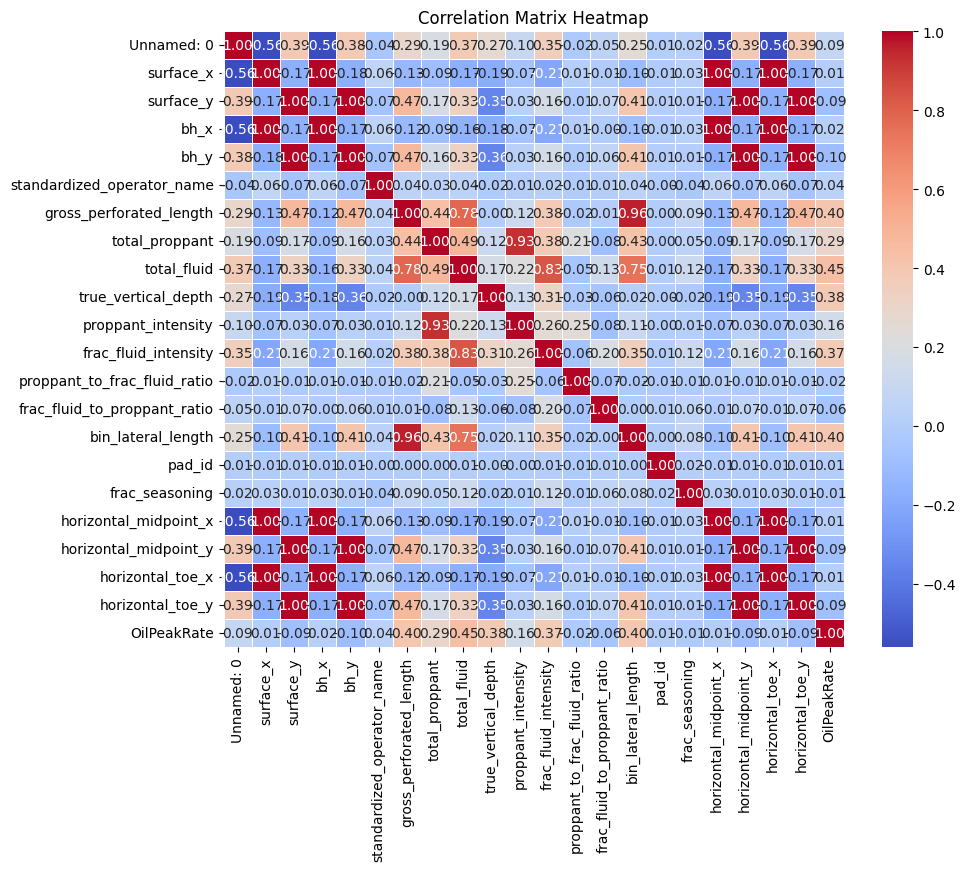

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()
# New correlation matrix with the clean numerical dataset

In [ ]:
df.drop(columns = ['bh_x', 'bh_y', 'horizontal_midpoint_x', 'horizontal_midpoint_y', 'horizontal_toe_x', 'horizontal_toe_y'], inplace=True)
# Dropping all the columns that are highly correlated

In [ ]:
df.drop(columns = ['bin_lateral_length'], inplace = True)
# Dropping the bin lateral length since it is treated as categorical

In [ ]:
#df.drop(columns = ['frac_fluid_to_proppant_ratio', 'proppant_to_frac_fluid_ratio'], inplace = True)

In [ ]:
df = df.select_dtypes(include = 'float')
# Only including the

In [ ]:
df

,surface_x,surface_y,gross_perforated_length,total_proppant,total_fluid,true_vertical_depth,proppant_intensity,frac_fluid_intensity,proppant_to_frac_fluid_ratio,frac_fluid_to_proppant_ratio,frac_seasoning,OilPeakRate
0,1.383494e+06,7.173292e+05,3963.582677,76000.00000,NaN,8712.598425,19.174572,NaN,NaN,NaN,NaN,46.623023
1,1.380344e+06,7.119163e+05,3179.133858,113000.00000,5.610964e+05,8627.952756,35.544272,176.493480,0.201391,4.965455,NaN,59.750009
2,1.379916e+06,7.178450e+05,3810.039370,286571.42860,1.621424e+06,8801.181102,75.214821,425.566078,0.176741,5.658008,92.0,10.785716
3,1.383567e+06,7.066402e+05,3723.425197,106878.92860,4.377134e+05,8635.826772,28.704465,117.556659,0.244176,4.095414,NaN,123.797638
4,1.378963e+06,7.026240e+05,3811.023622,112789.71430,6.229802e+05,8664.370079,29.595648,163.467933,0.181049,5.523377,NaN,102.309540
...,...,...,...,...,...,...,...,...,...,...,...,...
29432,9.477118e+05,1.057502e+06,4101.377953,95857.14286,5.499711e+05,8877.952756,23.371936,134.094222,0.174295,5.737403,NaN,162.307168
29433,9.593475e+05,1.033564e+06,4512.795276,NaN,NaN,8479.330709,NaN,NaN,NaN,NaN,14.0,171.071455
29434,9.669162e+05,1.057804e+06,3660.433071,87857.14286,6.214390e+05,8640.748031,24.001844,169.771992,0.141377,7.073290,72.0,7.171827
29435,9.462629e+05,1.034169e+06,5930.118110,383857.14290,1.956479e+06,8389.763780,64.730101,329.922425,0.196198,5.096893,15.0,336.044270


In [ ]:
df.isna().sum()

surface_x                          0
surface_y                          0
gross_perforated_length          158
total_proppant                  1394
total_fluid                     1440
true_vertical_depth              105
proppant_intensity              1434
frac_fluid_intensity            1485
proppant_to_frac_fluid_ratio    1805
frac_fluid_to_proppant_ratio    1805
frac_seasoning                  4827
OilPeakRate                        0
dtype: int64

In [ ]:
#df = df.dropna(subset=['gross_perforated_length','total_proppant','total_fluid', 'true_vertical_depth', 'proppant_intensity', 'frac_fluid_intensity',  'bin_lateral_length', 'frac_seasoning'])

In [ ]:
df.fillna(df.median(), inplace = True)
# Filling the NAs with medians of each column

In [ ]:
df.isna().sum()
# Checking the NAs for the final dataset

surface_x                       0
surface_y                       0
gross_perforated_length         0
total_proppant                  0
total_fluid                     0
true_vertical_depth             0
proppant_intensity              0
frac_fluid_intensity            0
proppant_to_frac_fluid_ratio    0
frac_fluid_to_proppant_ratio    0
frac_seasoning                  0
OilPeakRate                     0
dtype: int64

In [ ]:
df.shape

(19306, 12)

In [ ]:
df.columns

Index(['surface_x', 'surface_y', 'gross_perforated_length', 'total_proppant',
       'total_fluid', 'true_vertical_depth', 'proppant_intensity',
       'frac_fluid_intensity', 'proppant_to_frac_fluid_ratio',
       'frac_fluid_to_proppant_ratio', 'frac_seasoning', 'OilPeakRate'],
      dtype='object')

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_no_outliers
# Keeping the data that is between 25th and 75th percentile

,surface_x,surface_y,gross_perforated_length,total_proppant,total_fluid,true_vertical_depth,proppant_intensity,frac_fluid_intensity,proppant_to_frac_fluid_ratio,frac_fluid_to_proppant_ratio,frac_seasoning,OilPeakRate
0,1.383494e+06,7.173292e+05,3963.582677,76000.00000,3.467340e+06,8712.598425,19.174572,570.812191,0.195242,5.121850,38.0,46.623023
1,1.380344e+06,7.119163e+05,3179.133858,113000.00000,5.610964e+05,8627.952756,35.544272,176.493480,0.201391,4.965455,38.0,59.750009
3,1.383567e+06,7.066402e+05,3723.425197,106878.92860,4.377134e+05,8635.826772,28.704465,117.556659,0.244176,4.095414,38.0,123.797638
4,1.378963e+06,7.026240e+05,3811.023622,112789.71430,6.229802e+05,8664.370079,29.595648,163.467933,0.181049,5.523377,38.0,102.309540
5,1.381250e+06,7.022932e+05,3536.417323,93000.00000,5.638857e+05,8668.307087,26.297801,159.451108,0.164927,6.063287,38.0,98.630968
...,...,...,...,...,...,...,...,...,...,...,...,...
29432,9.477118e+05,1.057502e+06,4101.377953,95857.14286,5.499711e+05,8877.952756,23.371936,134.094222,0.174295,5.737403,38.0,162.307168
29433,9.593475e+05,1.033564e+06,4512.795276,677285.71430,3.467340e+06,8479.330709,109.009654,570.812191,0.195242,5.121850,14.0,171.071455
29434,9.669162e+05,1.057804e+06,3660.433071,87857.14286,6.214390e+05,8640.748031,24.001844,169.771992,0.141377,7.073290,72.0,7.171827
29435,9.462629e+05,1.034169e+06,5930.118110,383857.14290,1.956479e+06,8389.763780,64.730101,329.922425,0.196198,5.096893,15.0,336.044270


In [ ]:
df_no_outliers_x = df_no_outliers.drop(columns = ['OilPeakRate'])
# Training set

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_no_outliers_x)
df_scaled = pd.DataFrame(scaled_data, columns=df_no_outliers_x.columns)
df_scaled
# Scaled dataset

,surface_x,surface_y,gross_perforated_length,total_proppant,total_fluid,true_vertical_depth,proppant_intensity,frac_fluid_intensity,proppant_to_frac_fluid_ratio,frac_fluid_to_proppant_ratio,frac_seasoning
0,2.275146,-1.166308,-1.029467,-1.536794,-0.120781,-0.108889,-1.930995,0.047463,-0.104430,-0.103642,0.014793
1,2.255771,-1.182734,-1.376219,-1.446291,-1.399785,-0.159098,-1.569432,-1.561085,0.039262,-0.243691,0.014793
2,2.275599,-1.198743,-1.135624,-1.461264,-1.454085,-0.154427,-1.720505,-1.801506,1.038984,-1.022797,0.014793
3,2.247274,-1.210930,-1.096903,-1.446806,-1.372551,-0.137496,-1.700821,-1.614220,-0.436080,0.255918,0.014793
4,2.261347,-1.211934,-1.218288,-1.495212,-1.398558,-0.135161,-1.773662,-1.630606,-0.812788,0.739397,0.014793
...,...,...,...,...,...,...,...,...,...,...,...
14815,-0.405376,-0.134090,-0.968557,-1.488223,-1.404682,-0.010808,-1.838286,-1.734045,-0.593893,0.447574,0.014793
14816,-0.333805,-0.206727,-0.786697,-0.066045,-0.120781,-0.247255,0.053221,0.047463,-0.104430,-0.103642,-1.447605
14817,-0.287249,-0.133175,-1.163469,-1.507791,-1.373229,-0.151508,-1.824373,-1.588504,-1.363076,1.643836,2.086525
14818,-0.414289,-0.204892,-0.160193,-0.783773,-0.785693,-0.300382,-0.924796,-0.935201,-0.082092,-0.125990,-1.386672


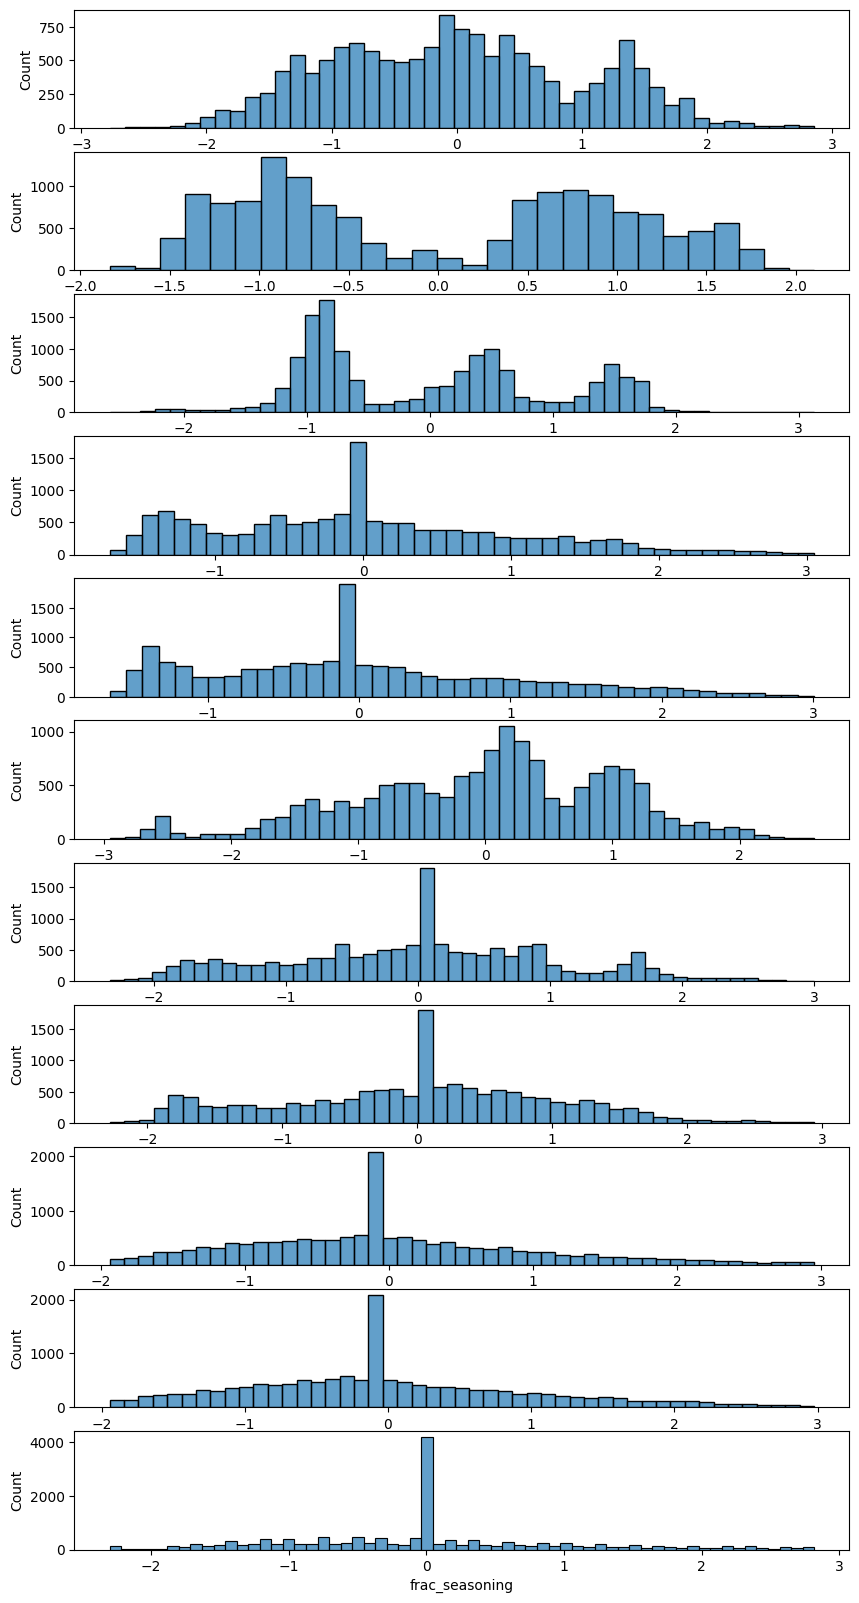

In [ ]:
fig, axes = plt.subplots(11, 1, figsize=(10, 20))
for i, ax in enumerate(fig.axes):
    sns.histplot(x=df_scaled.columns[i],alpha=0.7, data=df_scaled, ax=ax)
# Distribution of all the variables

In [ ]:
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df_no_outliers[['OilPeakRate']], test_size = 0.2, random_state = 0)
# Spliting the dataset into training set and testing set

In [ ]:
linear_model = reg = LinearRegression().fit(X_train, y_train)
y_pred_line = linear_model.predict(X_test)
rmse_linear = math.sqrt(mean_squared_error(y_pred_line, y_test))
rmse_linear
# Linear Regression

99.30390762960188

In [ ]:
linear_model.coef_

array([[ 18.94432738, -22.33419226,  61.03514668, -35.4921662 ,
         24.63635733,  31.96852543,  40.65658193,   3.18387709,
          9.59227991,   1.17679015,  -5.64803507]])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=100, random_state=0).fit(X_train, y_train.values.ravel())
y_pred_rf = rf.predict(X_test)
rmse_rf = math.sqrt(mean_squared_error(y_pred_rf, y_test))
rmse_rf
# Random Forest - Final Model

81.4765056896456

In [ ]:
# For the testing here:

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace = True)

([<matplotlib.axis.XTick at 0x7b81c1cc5810>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11')])

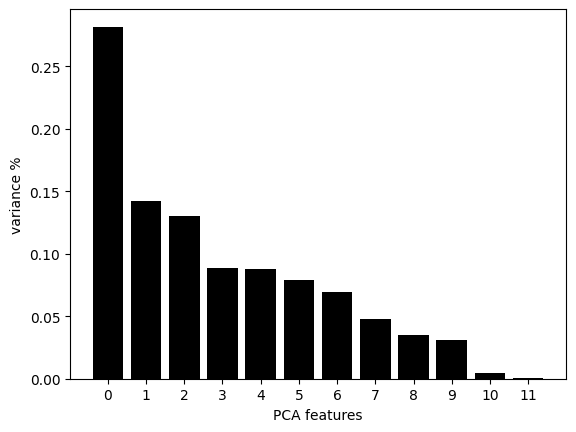

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(df)
pca = PCA()
principalComponents = pca.fit_transform(X_std)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# We also tried to run PCA on the dataset with K means clustering

Text(0, 0.5, 'PCA 2')

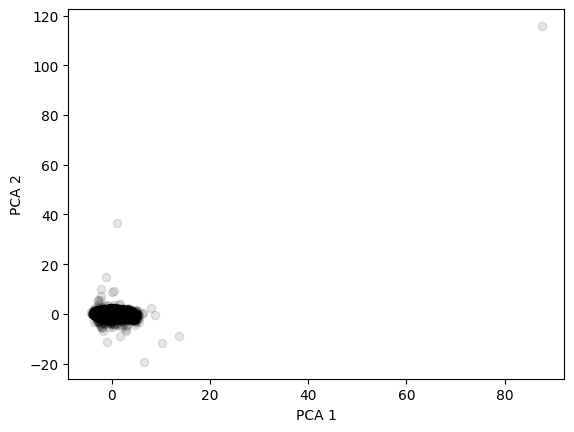

In [ ]:
PCA_components = pd.DataFrame(principalComponents)
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
# We couldn't find any remarkable pattern